## Business Problem

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

* They first identify a set of employees based on recommendations/ past performance.
* Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
* At the end of the program, based on various factors such as training performance, an employee gets the promotion

## Importing all the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
import ppscore as pps
import sklearn
import imblearn

#for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#setting up size of the plot
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

C:\Users\hp world\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploring the data

In [101]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [8]:
print('The shape of the training dataset is', train.shape)
print('The shape of the training dataset is', test.shape)


The shape of the training dataset is (54808, 14)
The shape of the training dataset is (23490, 13)


## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
#Lets check if the target variable is balanced or not
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

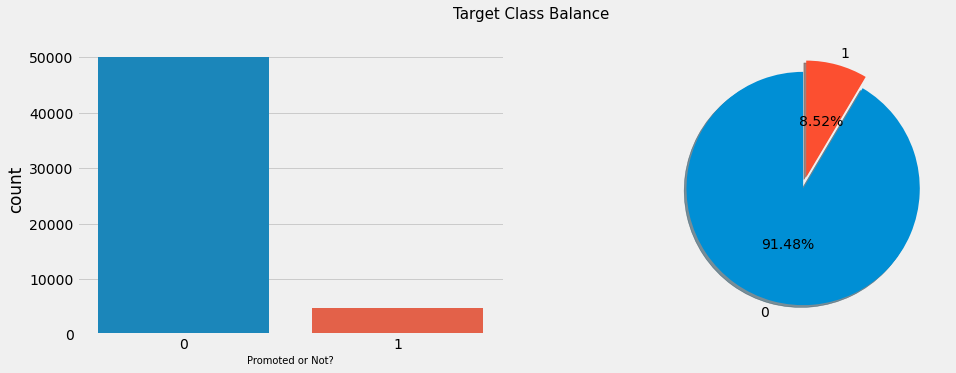

In [11]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'])
plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1],autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

Here in the dataset the variable **is_promoted** is the target variable and it was important to check if that was balanced or not as building model out of an unbalanced dataset will fetch biased results towards the majority class.
And as it turns out the dataset is unbalanced and as result I will have to balance it

## Exploratory Data Analysis (EDA)

Here I have tried a relatively new library **sweetviz** which fetches an analysis report of the entire train and test datasets. I will attach the report with the notebook

Here in the code the train and test datasets are passed along with the target variable **is_promoted** on which the comparison will be made

In [12]:
# Lets make a report using sweetviz for complete EDA
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "is_promoted")
my_report.show_html("Report.html")

:FEATURES DONE:                    |█████████████████████| [100%]   00:19  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:30  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Descriptive Statistics (For numerical data type variables)

In [13]:
train.iloc[:,1:].describe().style.background_gradient(cmap = 'copper')

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Now this is where I normally try to see if my dataset has any outliers. For that I normally check the mean of the columns and compare it with the median of that respective column and if there is a large deviation between the two then I infer that the particular column has outliers.

It is quite clear that we are not having Outliers in our Dataset as the values of mean and median do not deviate drastically for any column

### Descriptive Statistics (For obeject data type variables)

In [14]:
#Lets check the columns having object data type
train.select_dtypes('object').columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [15]:
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Next I am going to write an interactive fuction which will take input from the user in the form of the numerical columns of the data set and then give the **Maximum value, Minimum value, Mean, Median, Standard Deviation** of that particular column

In [16]:
# Lets make an interactive function to check the statistics of these numerical columns at a time

@interact_manual
def check(column = list(train.select_dtypes('number').columns[1:8])):
    print("Maximum Value :", train[column].max())
    print("Minimum Value :", train[column].min())
    print("Mean : {0:.2f}".format(train[column].mean()))
    print("Median :", train[column].median())
    print("Standard Deviation :  {0:.2f}".format(train[column].std()))

interactive(children=(Dropdown(description='column', options=('no_of_trainings', 'age', 'previous_year_rating'…

## Missing Values (Identification & Treatment)

In [16]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
train_missing_data

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.00,0.0,0.00
age,0,0.00,0.0,0.00
avg_training_score,0,0.00,0.0,0.00
awards_won?,0,0.00,0.0,0.00
department,0,0.00,0.0,0.00
education,2409,4.40,1034.0,4.40
employee_id,0,0.00,0.0,0.00
gender,0,0.00,0.0,0.00
is_promoted,0,0.00,NaN,NaN
length_of_service,0,0.00,0.0,0.00


In [18]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.00,0.0,0.00
age,0,0.00,0.0,0.00
avg_training_score,0,0.00,0.0,0.00
awards_won?,0,0.00,0.0,0.00
department,0,0.00,0.0,0.00
education,2409,4.40,1034.0,4.40
employee_id,0,0.00,0.0,0.00
gender,0,0.00,0.0,0.00
is_promoted,0,0.00,NaN,NaN
length_of_service,0,0.00,0.0,0.00


We can see from the above table, that Only two columns have missing values in Train and Test Dataset both. Also, the Percentage of Missing values is around 4 and 7% in education, and previous_year_rating respectively. So, do not have delete any missing values, we can simply impute the values using Mean, Median, and Mode Values. 

Lets check the Data Types of these Columns, so that we can impute the missing values in these columns.

In [19]:
train.dtypes[train.isnull().any()]

education                object
previous_year_rating    float64
dtype: object

In [102]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())


Number of Missing Values Left in the Training Data : 0


In [103]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


we imputed the missing values, using the Mode values, even for the previous year rating, it only seems to be numerical, but in real it's also categorical.
After, Imputing the missing values in the training and testing data set we can see that there are no Null Values left in any of the datasets.

So, we are Done with the Treatment of the Missing Values.

## Univariate Analysis

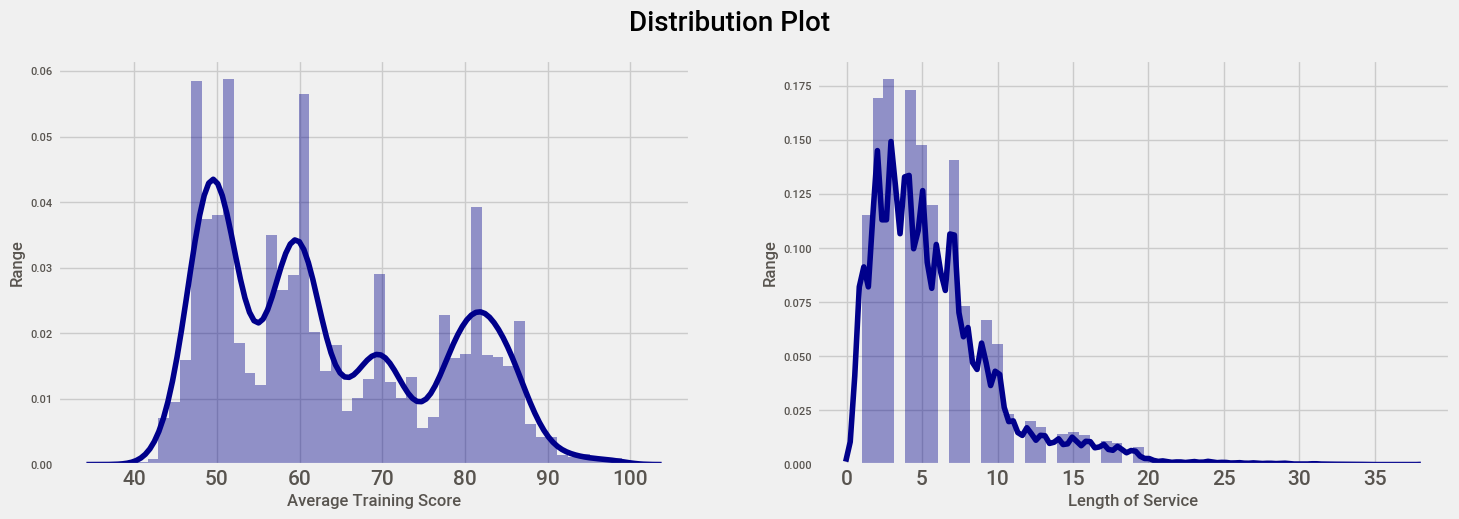

In [25]:
plt.style.use('fivethirtyeight')

# Distribution plot for Average training score
plt.subplot(1, 2, 1)
sns.distplot(train['avg_training_score'], color = 'darkblue')
plt.xlabel('Average Training Score', fontsize = 12)
plt.xticks(fontsize = 15)
plt.ylabel('Range', fontsize = 12)

# Distribution plot for Length of Service
plt.subplot(1, 2, 2)
sns.distplot(train['length_of_service'], color = 'darkblue')
plt.xlabel('Length of Service', fontsize = 12)
plt.xticks(fontsize = 15)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Distribution Plot', fontsize = 20)
plt.show()

From the plot we can say that the **average_trainin_score** mostly dwell around 42-65 and **length_of_service**  for most employees is 1-20 years

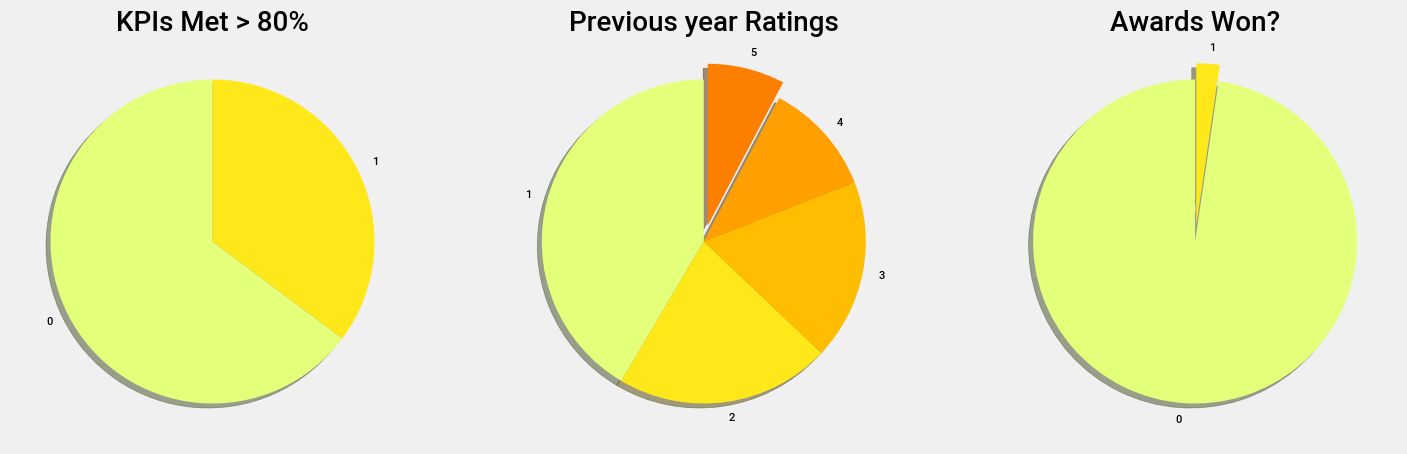

In [29]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]


plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]


plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)



plt.show()

We, can see that there are some pie charts, we have for representing KPIs, Previous year Ratings, and Awards Won?

Also, The one Big Pattern is that only some of the employees could reach above 80% of KPIs set.
Most of the Employees have a very low rating for the previous year, and
very few employees, probably 2% of them could get awards for their work, which is normal.

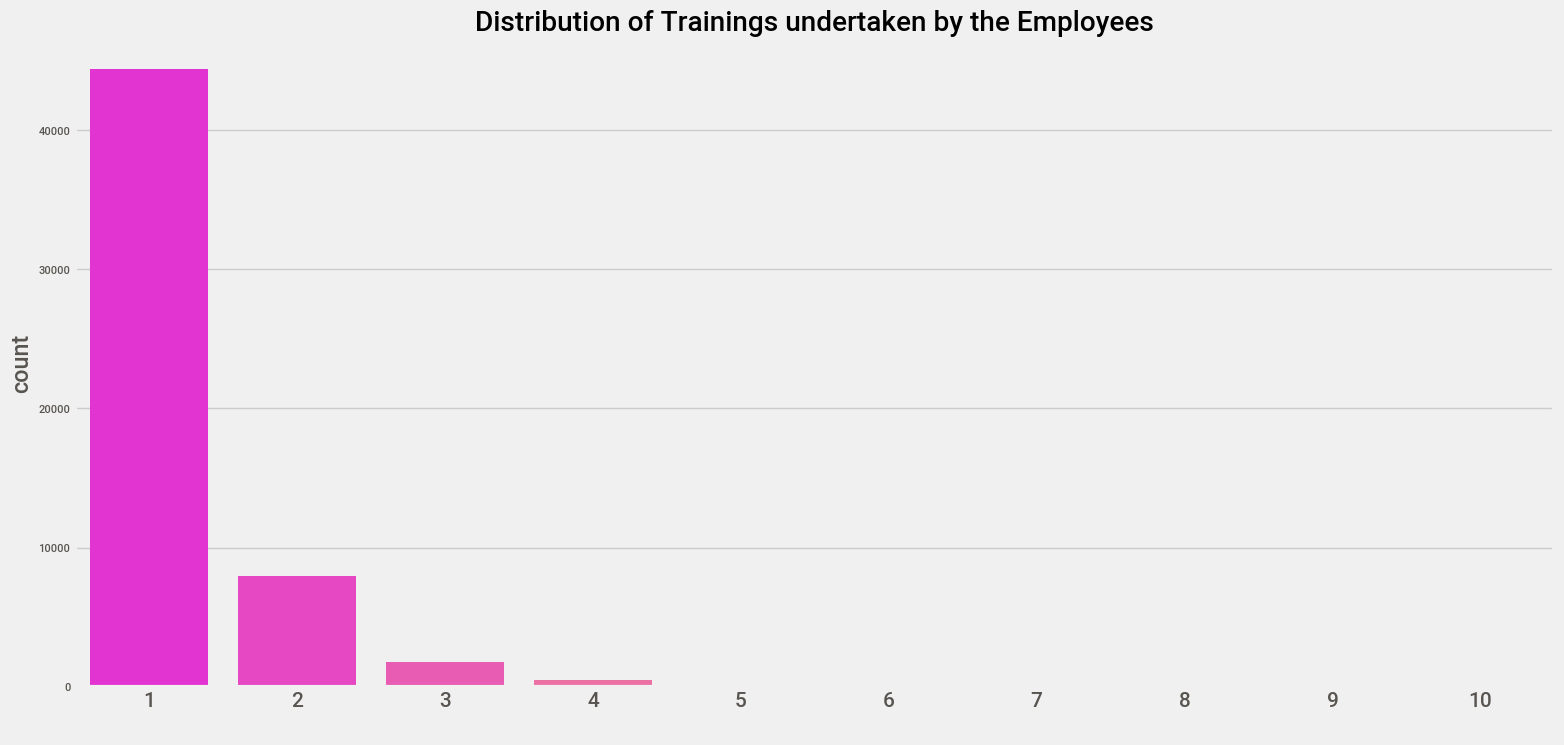

In [30]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 8)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.xticks(fontsize = 15)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

The abov Countplot, where are checking the distribution of trainings undertaken by the Employee, It is clearly visible that 80 % of the employees have taken the training only once, and there are negligible no. of employees, who took trainings more than thrice.

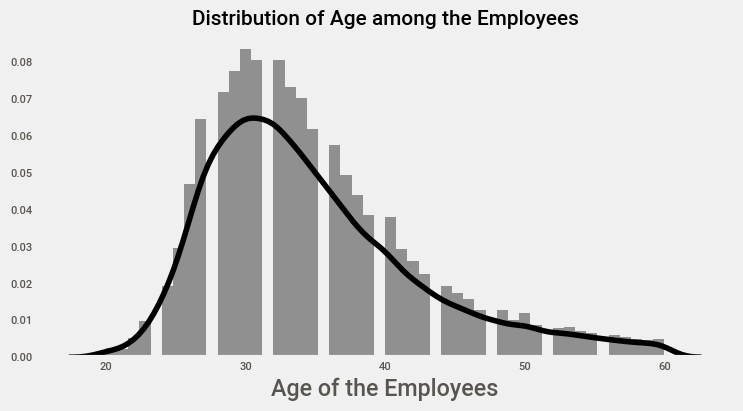

In [31]:
#Lets check the distribution of age of the employees in the dataset
plt.rcParams['figure.figsize'] = (8, 4)
sns.distplot(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

In [32]:
# lets now check the columns which are categorical
train.select_dtypes('object').head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


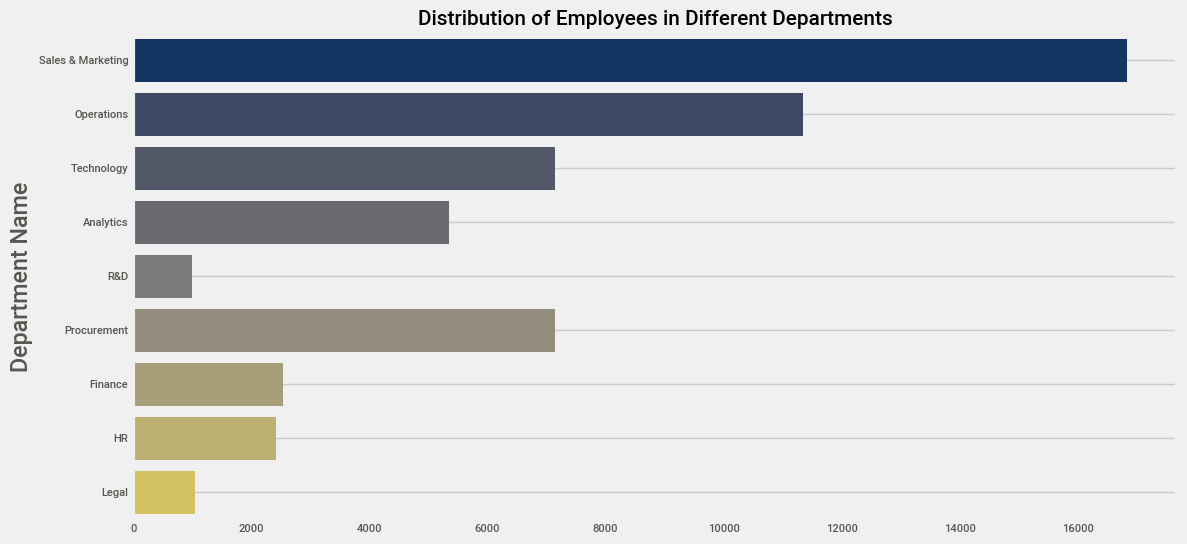

In [33]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'h')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()
plt.show()

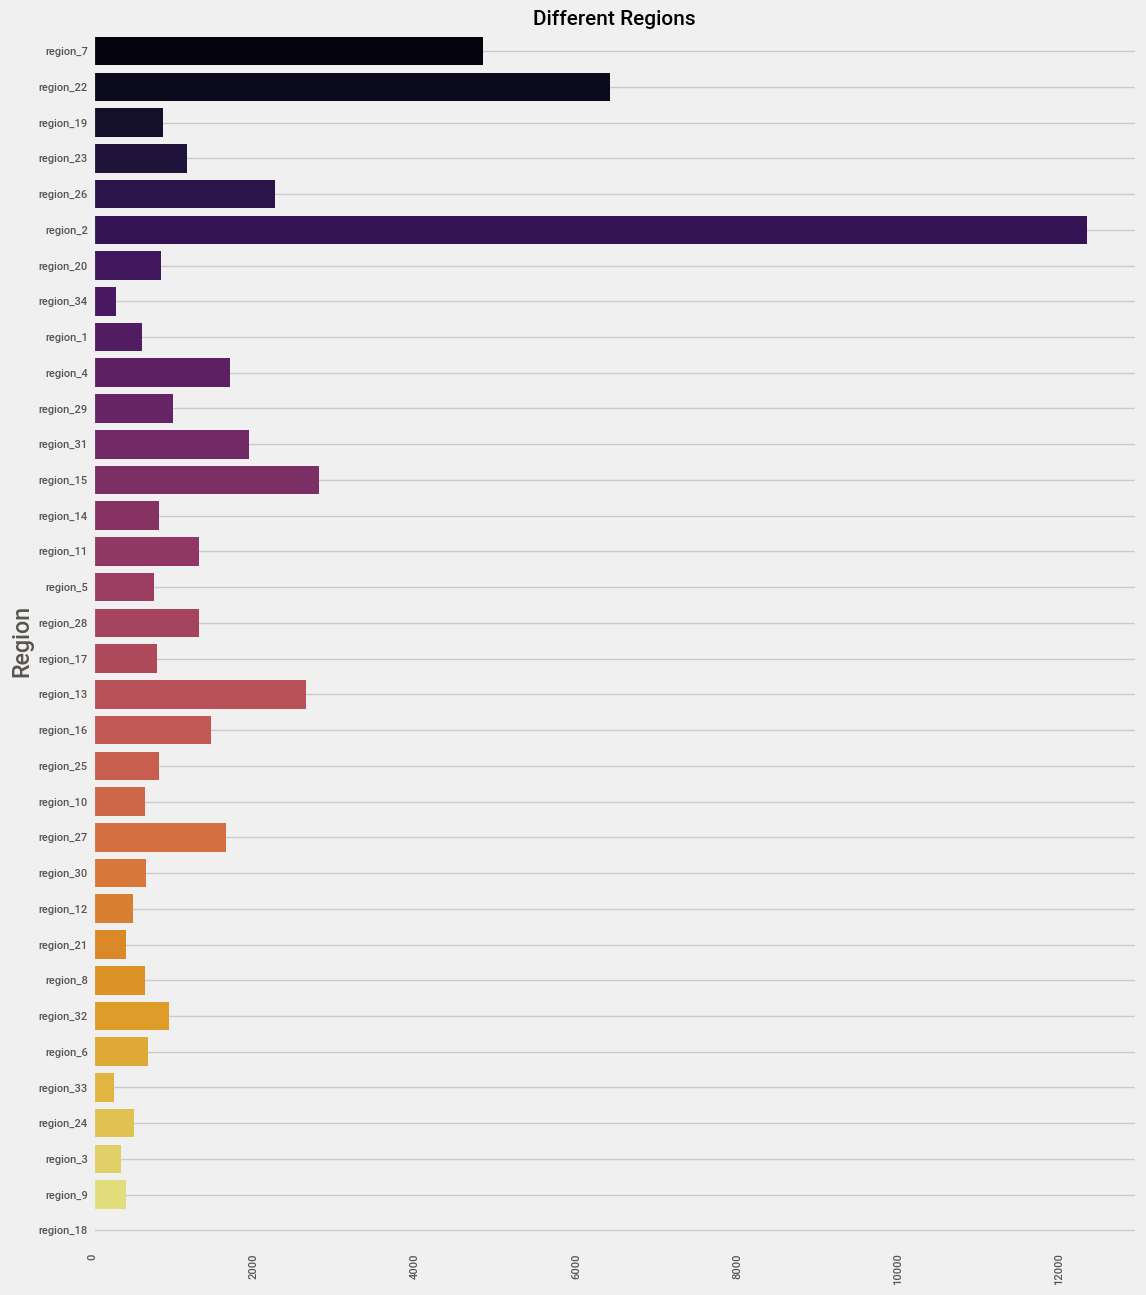

In [34]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

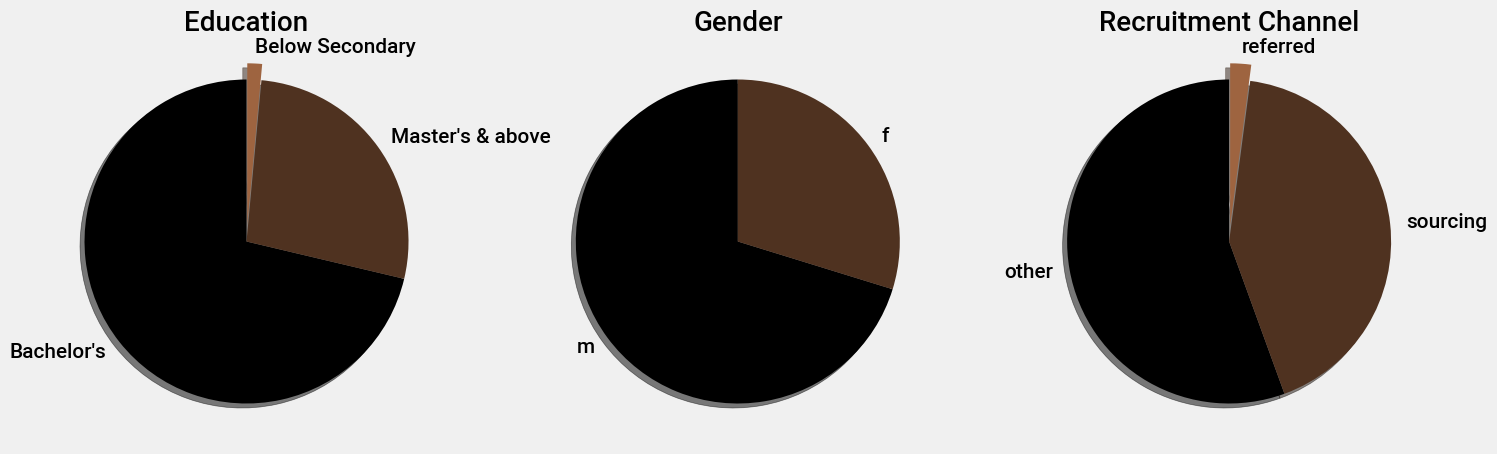

In [36]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90,textprops={'fontsize': 15})
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90,textprops={'fontsize': 15})
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90,textprops={'fontsize': 15})
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

From, the above pie charts displayed for representing Education, Gender, and Recruitment Channel.

lets infer the Main Highlights
* Very Few employees are actually working only after their Secondary Education
* Obviously Females are again in Minority as compared to their Male Counterparts.
* The Recruitment Channel, says that the Referred Employees are very less, i.e., most of the employees are recruited either by   sourcing, or some other recruitment agencies, sources etc.

In [38]:
# interactive function for plotting univariate charts for categorical data

plt.rcParams['figure.figsize'] = (15, 4)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column = list(train.select_dtypes('object').columns),
          palette = ['cividis','copper','spring','Reds','Blues']):
    sns.countplot(train[column], palette = palette)
    plt.xticks(fontsize=15)
   
    plt.show()

interactive(children=(Dropdown(description='column', options=('department', 'region', 'education', 'gender', '…

## Bivariate Analysis

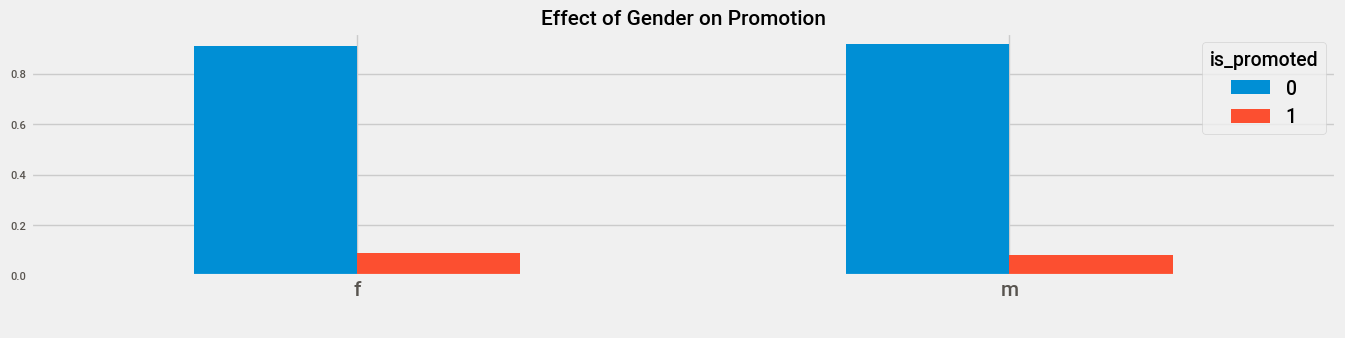

In [48]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.xticks(rotation = 360,fontsize = 15)
plt.show()

In [51]:
x = pd.crosstab(train['gender'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0)

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151


As we have already seen that the Females are in Minority, but when it comes to Promotion, they are competing with their Men Counterparts neck-to-neck.

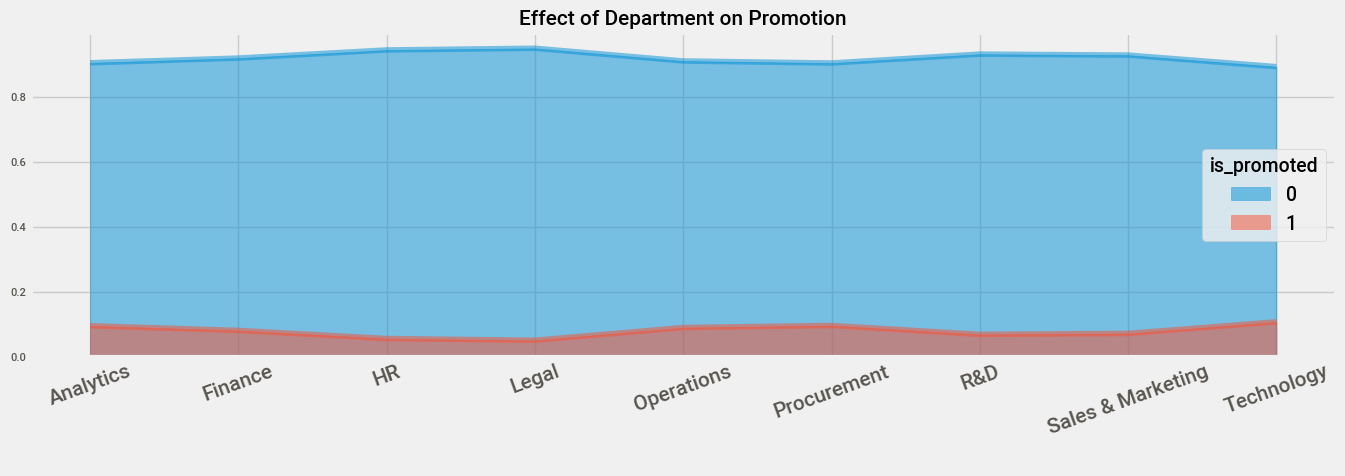

In [49]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20,fontsize = 15)
plt.xlabel(' ')
plt.show()

In [52]:
x = pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0)

is_promoted,0,1
department,,
Analytics,0.904335,0.095665
Finance,0.918770,0.081230
HR,0.943755,0.056245
Legal,0.948989,0.051011
Operations,0.909852,0.090148
Procurement,0.903614,0.096386
R&D,0.930931,0.069069
Sales & Marketing,0.927969,0.072031
Technology,0.892407,0.107593


From, the above chart we can see that almost all the Departments have a very similar effect on Promotion. So, we can consider that all the Departments have a similar effect on the promotion.

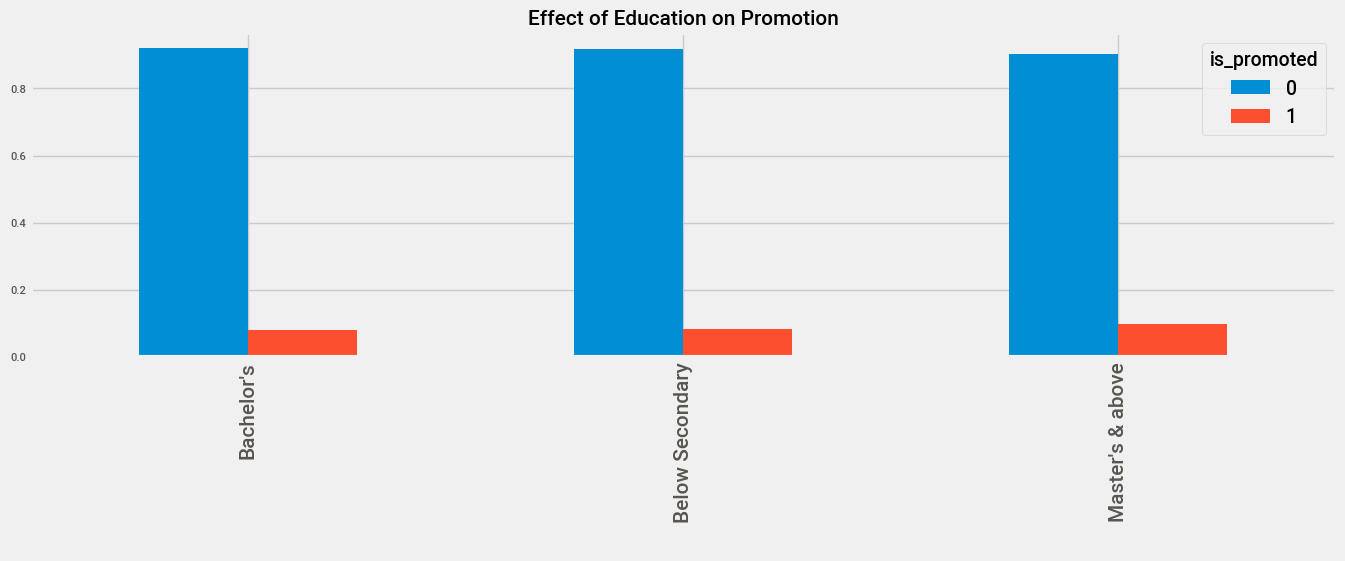

In [50]:
# lets compare the effect of Education and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['education'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Education on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.xticks(fontsize = 15)
plt.show()

In [53]:
x = pd.crosstab(train['education'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0)

is_promoted,0,1
education,,
Bachelor's,0.919904,0.080096
Below Secondary,0.916770,0.083230
Master's & above,0.901441,0.098559


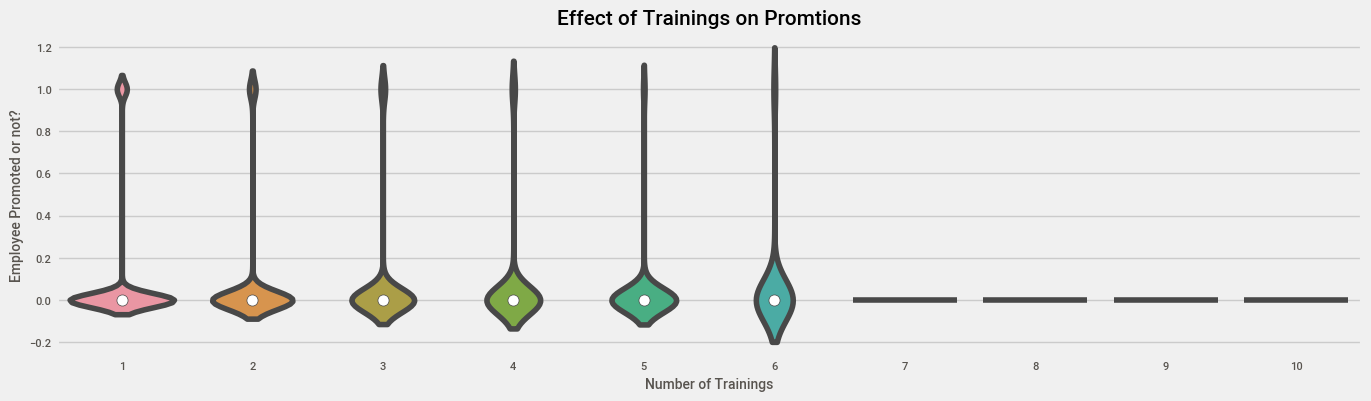

In [35]:
# checking the effect of number of trainings on promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.violinplot(train['no_of_trainings'], train['is_promoted'])
plt.title('Effect of Trainings on Promtions', fontsize = 15)
plt.xlabel('Number of Trainings', fontsize = 10)
plt.ylabel('Employee Promoted or not?', fontsize = 10)
plt.show()

Again, after checking this plot, it becomes clear that the employee who take more than 5 trainings are probably not going to get a promotion. Also it is also clear from the violin plots that not many people took more than 6 trainings

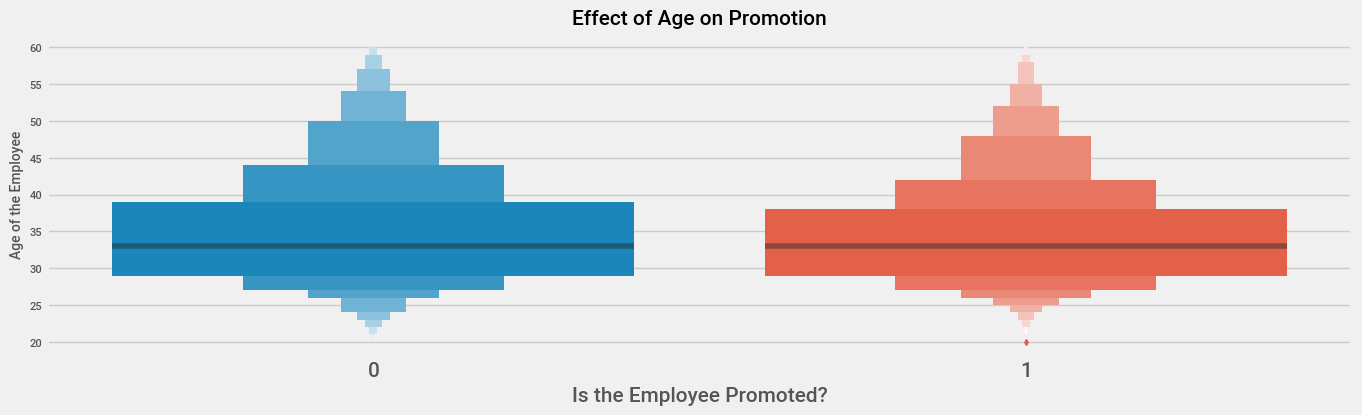

In [55]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'])
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 15)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.xticks(fontsize = 15)
plt.show()

From the above plot it can be seen that the distribution of age for the people promoted and not promoted are almost the same where bulk of the people are having the age of around **30-45**

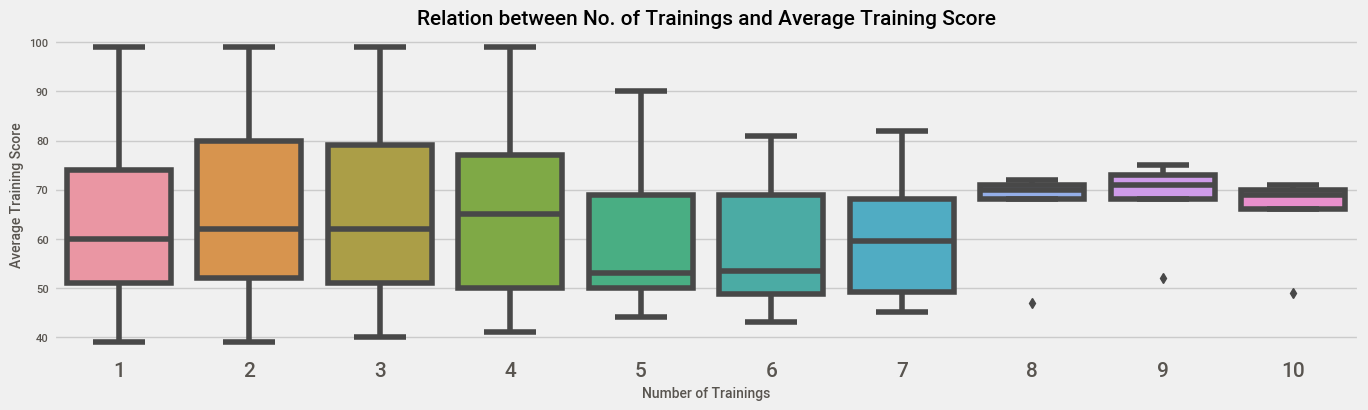

In [57]:
# lets check relation between number of trainings and average training score

plt.rcParams['figure.figsize'] = (15,4)
sns.boxplot(train['no_of_trainings'], train['avg_training_score'])
plt.title('Relation between No. of Trainings and Average Training Score', fontsize = 15)
plt.xlabel('Number of Trainings', fontsize = 10)
plt.ylabel('Average Training Score', fontsize = 10)
plt.xticks(fontsize = 15)
plt.show()

From the above plot we can infer that people doing upto 4 trainings have pretty much similar average score with the exception of people doing 5-6 trainings where the avaerage median score dipped but one more interesting observation is that people doing more than 7 trainings have relatively higher average score in terms of median although the number of candidates is less

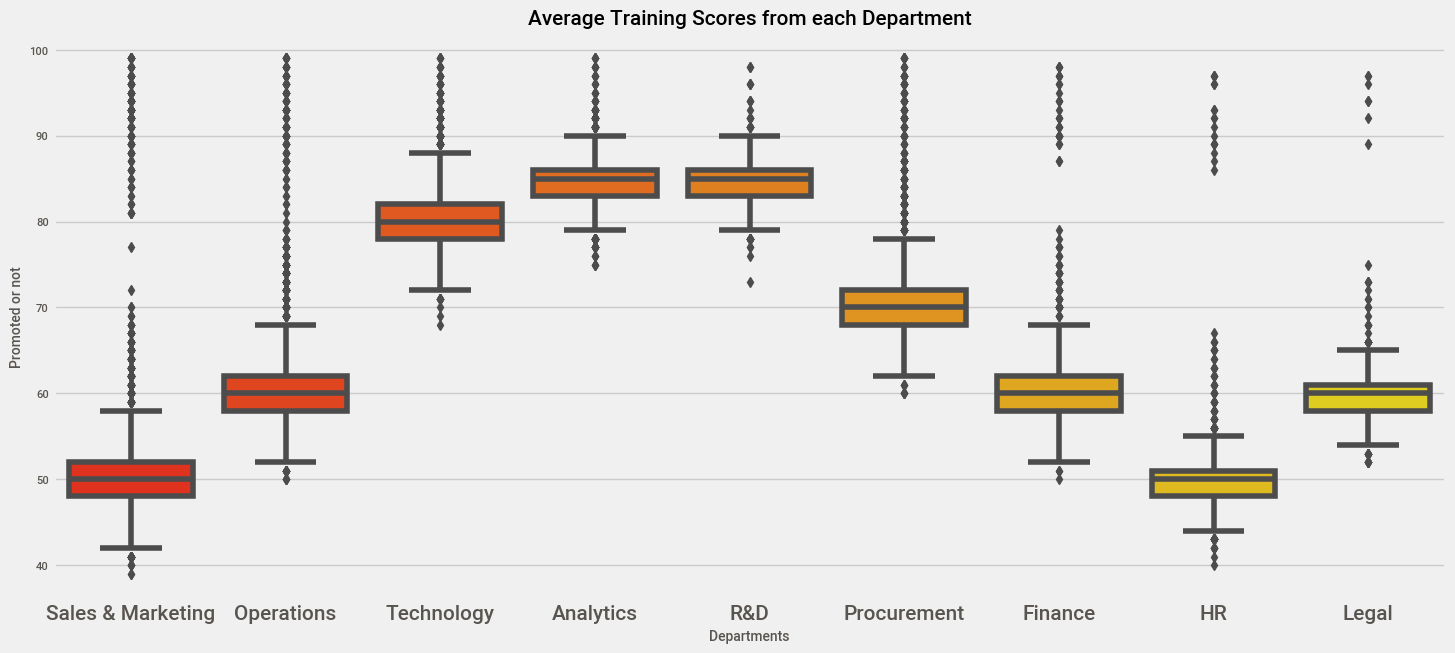

In [58]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.xticks(fontsize = 15)
plt.show()

The above plot shows the distribution of average training scores acorss the different departments in the company and it seems that the employees from **Analytics and R&D** have done pretty well throughout

In [69]:
#KPI met vs promotion
x = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
x

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


In [71]:
## lets check the relation between the Awards and Promotion

x = pd.crosstab(train['awards_won?'], train['is_promoted'])
x

is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


Here I can say it is an interestin finding. If we read the table properly we see that out of almost 53k odd people who did not win an award only 4k+ people got promotion that is roughly around 8%

Now out of the 1200 odd employees who won an award 559 got a promotion, which is roughly 47% of the employees who got an award got a promotion, so we can say winning an award is a strong parameter for the promotion

In [72]:
# lets check the no. eployees who won awards from each Department

train[['department', 'awards_won?']].groupby(['department']).agg('sum').sort_values(by = 'awards_won?',
                                                            ascending = False).style.background_gradient('magma')

,awards_won?
department,
Sales & Marketing,361
Operations,262
Technology,185
Procurement,171
Analytics,130
Finance,70
HR,45
Legal,25
R&D,21


In [74]:
# lets also check the value counts of the number of trainings employee took.
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [75]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,29663,Sales & Marketing,region_22,Bachelor's,m,referred,1,27,1.0,2,0,0,58,1
51374,28327,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,31,1.0,5,0,0,58,1


So these 2 employees can be considered exceptional, who against all odds got the promotion. Or in terms of Data Science we can call them **outliers**

## Multivariate Analysis

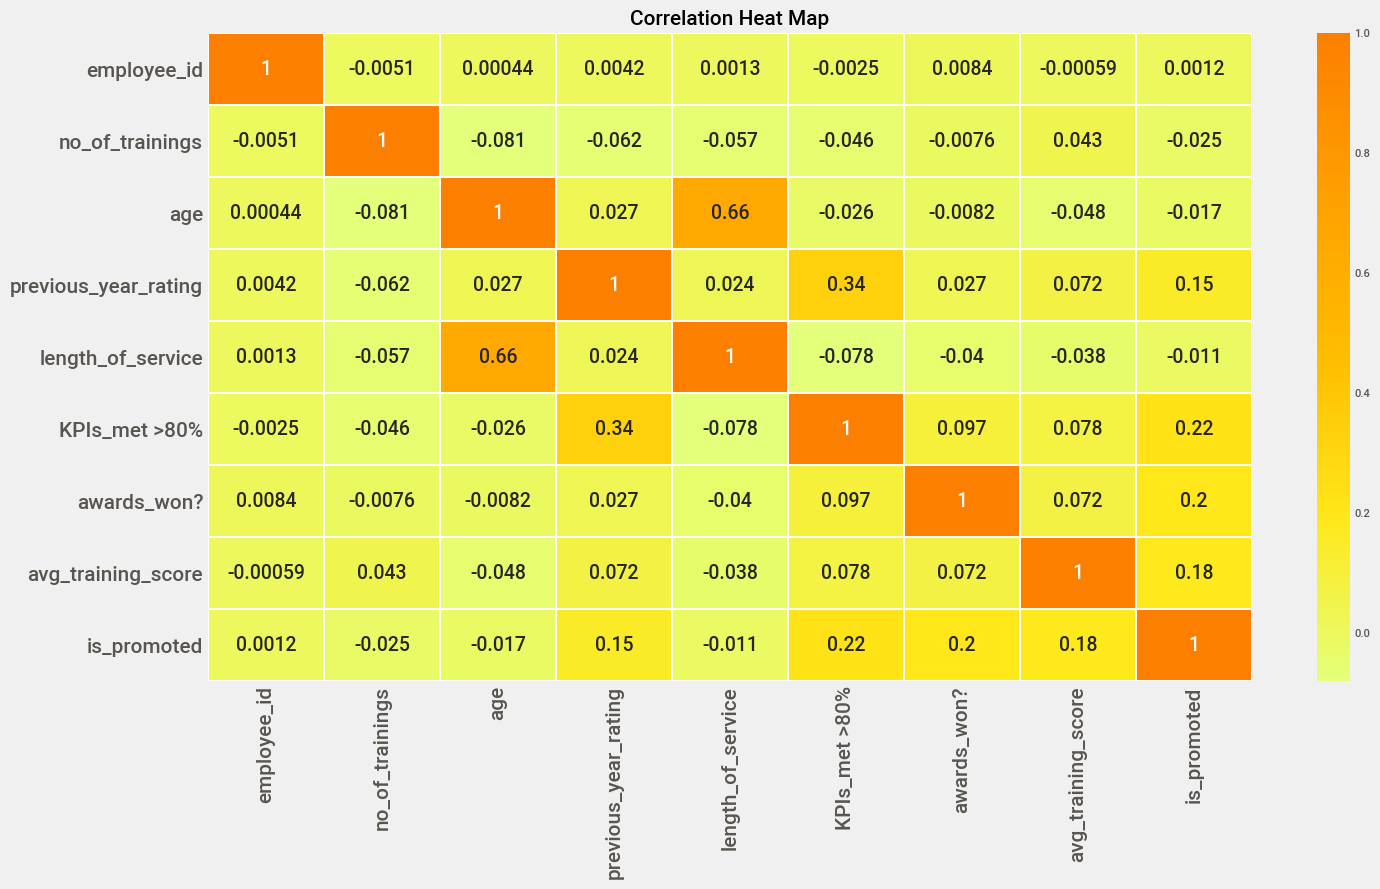

In [62]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5,cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.xticks(fontsize = 15,rotation = 90)
plt.yticks(fontsize = 15)
plt.show()

Here, we can see some obvious results, that is Length of Service, and Age are Highly Correlated,
Also, KPIs, and Previous year rating are correlated to some extent, hinting that there is some relation.
Where as there is some direct relation of the variables **previous_year_rating, KPIs_met>80%, awards_won?, average_training_score** with the target variable **is_promoted**

<function matplotlib.pyplot.show(close=None, block=None)>

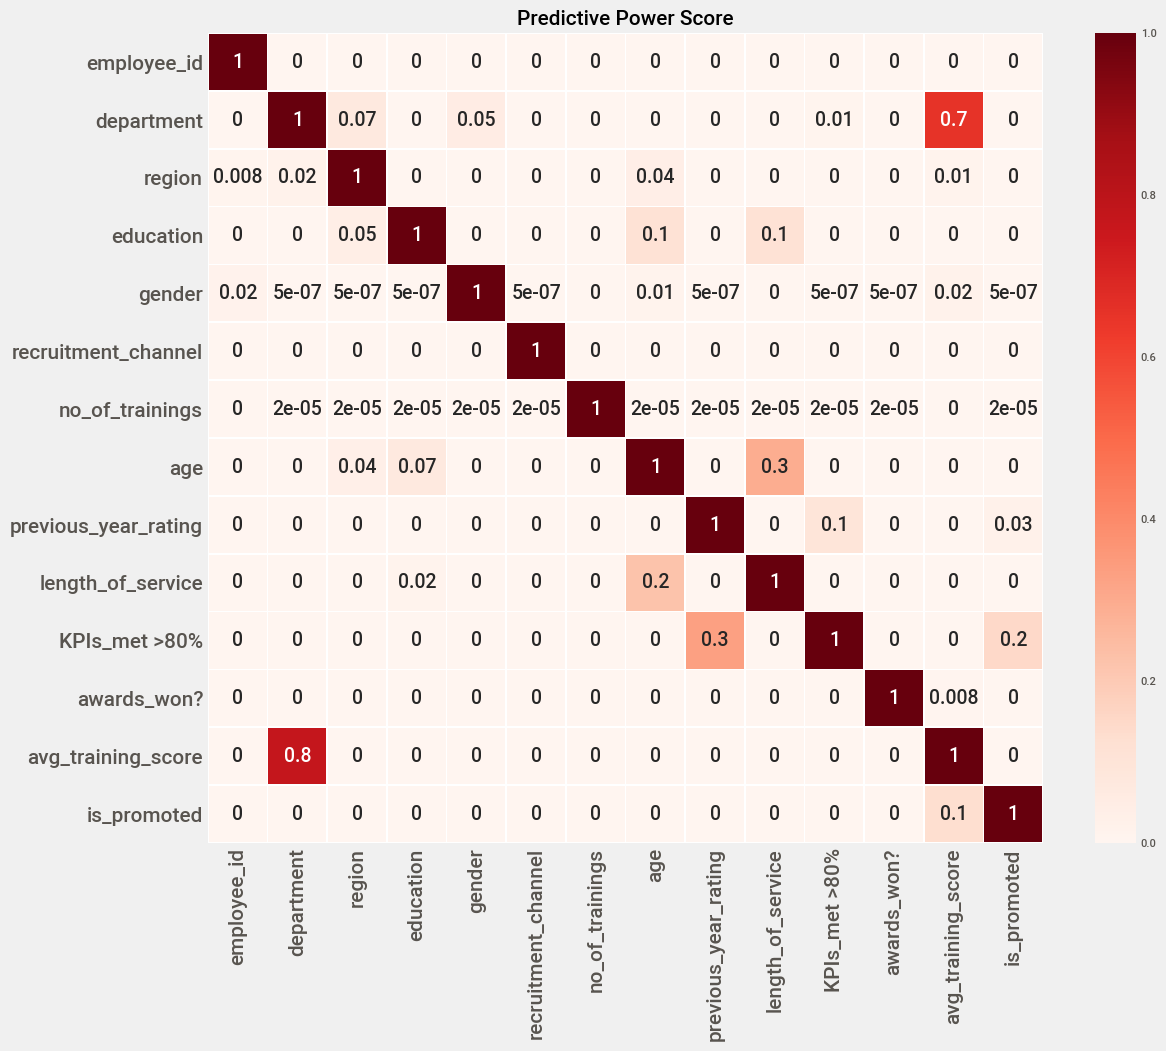

In [64]:
# lets use ppscore for better insights

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 10)
sns.heatmap(pps.matrix(train), annot = True, linewidth = 0.5, cmap = 'Reds', fmt = '.0g')
plt.title('Predictive Power Score', fontsize = 15)
plt.xticks(fontsize = 15,rotation = 90)
plt.yticks(fontsize = 15)
plt.show

After checking the Predictive Power score, we can see that there is one more pattern, that is the Department and Average Training Score is very Highly Correlated

So from the above matrices we can come to the conclusion that few variables like **previous_year_rating, KPIs_met>80%, awards_won?, average_training_score, Departments** will play a good role towards building a good model

## Feature Engineering

Now I will create a few new columns out of the existing columns in order to make our model better and also I will drop a few columns which are not going to be useful in the model building

In [104]:
# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']


In [105]:
# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

* we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
* even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
* also the employee id is not useful so lets remove it.


In [106]:
train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
print(train.columns)
print(train.shape)

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')
(54808, 13)


In the previous sections we saw that the no of traings beyond 5 is negligible compared to the other numbers , so here in the next section I am going to cap and convert the any number of training beyond 5  to 5. This will particularly be helpful when I encode these variables

In [107]:
train['no_of_trainings'] = train['no_of_trainings'].replace((6, 7, 8, 9, 10),(5, 5, 5, 5, 5))

In [108]:
train['no_of_trainings'].value_counts()

1    44378
2     7987
3     1776
4      468
5      199
Name: no_of_trainings, dtype: int64

In the previous section we also saw that there are 2 outlier points in the data, so I will remove those outliers as well

In [109]:
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (54808, 13)
After Deletion of the above two rows : (54806, 13)


#### Categorical variables and Encoding 

In [90]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [91]:
# lets check the value counts for the education column
train['education'].value_counts()

Bachelor's          36667
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

lets encode the education in their degree of importance 

In [110]:
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))


#### Encoding Using LabelEncoder

In [93]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])


In [112]:
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50


In [113]:
test.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,8,2,1,1,24,3.0,1,1,0,77,4.0,77
1,2,2,0,1,31,3.0,5,0,0,51,3.0,51
2,7,2,1,1,31,1.0,4,0,0,47,1.0,47


So now we can see that all the variables have numbers in their respective rows, which is essential for building a model 

## Splitting the data

In [114]:
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test


In [115]:
print("Shape of the x :", x.shape) 
print("Shape of the y :", y.shape)
print("Shape of the x_test :", x_test.shape)

Shape of the x : (54806, 12)
Shape of the y : (54806,)
Shape of the x_test : (23490, 12)


## Resampling Of Data

* It is very important to resample the data, as the Target class is Highly imbalanced.
* Here We are going to use Over Sampling Technique to resample the data.

In [99]:
from imblearn.over_sampling import SMOTE

In [116]:
x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

In [117]:
print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


**lets also check the value counts of our target variables**

In [118]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4666
Name: is_promoted, dtype: int64
After Resampling :
1    50140
0    50140
Name: 0, dtype: int64


#### using train_test_split to create a validation set

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

In [121]:
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 12)
Shape of the y Train : (80224, 1)
Shape of the x Valid : (20056, 12)
Shape of the y Valid : (20056, 1)
Shape of the x Test : (23490, 12)


## Feature Scaling

* It is very import to scale all the features of the dataset into the same scale
* Here, we are going to use the standardization method, which is very commonly used.


In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

## Modelling

The first algorithm I am using out here is the **Logistic Regression**

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

The secind algorithm I am using here is the **DecisionTreeClassifier**

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_valid)


### Now I will compare the accuracies of both the models

In [128]:
from sklearn.metrics import confusion_matrix, classification_report

In [129]:
print("Training Accuracy for the Logistic Regression Model :", model.score(x_train, y_train))
print("Testing Accuracy for the Logistic Regression Model :", model.score(x_valid, y_valid))

Training Accuracy for the Logistic Regression Model : 0.7334463502193858
Testing Accuracy for the Logistic Regression Model : 0.7318508177104108


In [150]:
print("Training Accuracy for the Decision Tree Model :", model_tree.score(x_train, y_train))
print("Testing Accuracy for the Decision Tree Model :", model_tree.score(x_valid, y_valid))

Training Accuracy for the Decision Tree Model : 0.996322796170722
Testing Accuracy for the Decision Tree Model : 0.9408655763861189


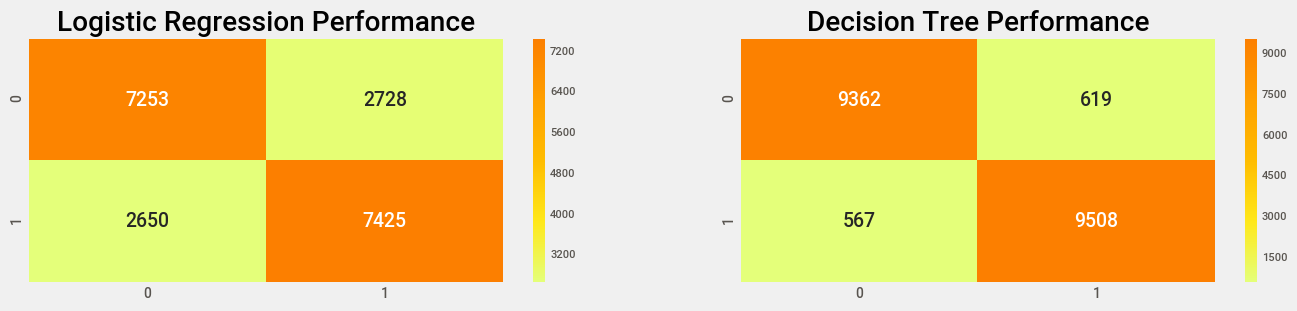

In [145]:
plt.subplot(1,2,1)
cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (15, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Logistic Regression Performance')

plt.subplot(1,2,2)
cm = confusion_matrix(y_valid, y_pred_tree)
plt.rcParams['figure.figsize'] = (15, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Decision Tree Performance')

plt.show()

So by comparing we can see that the Decision Tree classifier is performing very well out here.

So I will use this algorithm to find the answers for the test dataset

As the model has been selected I will do some Hyperparameeter tuning on this one in order to make it better

## Hyper Parameter Tuning

In [146]:
from sklearn.model_selection import GridSearchCV

In [149]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [38, 40, 42],
            }

grid = GridSearchCV(model_tree, param_grid = parameters, scoring = 'accuracy')
grid.fit(x_train, y_train)

print("The Best Parameters :", grid.best_params_)
print("The Accuracy for the Best Model :", grid.best_score_)

The Best Parameters : {'criterion': 'entropy', 'max_depth': 38}
The Accuracy for the Best Model : 0.9358795372955724


With the obtained parameters I will again train the model

In [156]:
model_tree_1 = DecisionTreeClassifier(criterion = 'entropy',
                               max_depth = 38,
                               )
model_tree_1.fit(x_train, y_train)
y_pred_tree_1 = model_tree_1.predict(x_valid)

In [157]:
print("Training Accuracy :", model_tree_1.score(x_train, y_train))
print("Testing Accuracy :", model_tree_1.score(x_valid, y_valid))


Training Accuracy : 0.9962230753889111
Testing Accuracy : 0.9414639010769844


So the testing accuracy increased here .

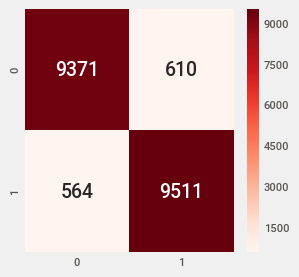

In [158]:
cm = confusion_matrix(y_valid, y_pred_tree_1)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Reds', fmt = '.8g')
plt.show()

 ## Prediction on Test DataSet

In [161]:
test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,8,2,1,1,24,3.0,1,1,0,77,4.0,77
1,2,2,0,1,31,3.0,5,0,0,51,3.0,51
2,7,2,1,1,31,1.0,4,0,0,47,1.0,47
3,5,2,0,3,31,2.0,9,0,0,65,2.0,195
4,1,2,1,1,30,4.0,7,0,0,61,4.0,61


In [162]:
test_is_promoted = model_tree_1.predict(test)

In [164]:
test['is_promoted'] = test_is_promoted